## 서울시 공공자전거 데이터 구조 확인

In [1]:
#!pip install seaborn

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import platform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
- "서울특별시 공공자전거 이용정보(시간대별)_21.01.csv" 파일 불러오기: df_b 변수 저장
- "서울시 대여소 정보(21.12월 기준).csv" 파일 불러오기: df_l 변수 저장
- 각 데이터 정보 확인(행/열/데이터 형식)

In [3]:
fname1 = "c:/pydata/seoul_time/서울특별시 공공자전거 이용정보(시간대별)_21.01.csv"
fname2 = "c:/pydata/서울시 대여소 정보(21.12월 기준).csv"

# 이용정보 불러오기
df_b = pd.read_csv(fname1, encoding='cp949')
print(df_b.info(), "\n")

# 대여소정보 불러오기
df_l = pd.read_csv(fname2, encoding='cp949')
print(df_l.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대여소
번호      2586 non-null   float64
 1   보관소(대여소)명   2586 non-null   object 
 2   소재지(위치)    

## 2. 대여소 정보 전처리

In [4]:
# df_l 데이터 샘플 5개 보기
display(df_l.head())

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD


In [5]:
# df_l 열 이름 정의
df_l.columns=['대여소번호','대여소명', '소재지(자치구)', '상세주소', '위도', '경도',
              '설치시기', '설치형태(LCD)', '설치형태(QR)', '운영방식']
display(df_l.head())

,대여소번호,대여소명,소재지(자치구),상세주소,위도,경도,설치시기,설치형태(LCD),설치형태(QR),운영방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD


In [6]:
# df_1의 데이터 index 값을 이용해 행 제거
df_l.drop(0, inplace=True)
display(df_l.head())

,대여소번호,대여소명,소재지(자치구),상세주소,위도,경도,설치시기,설치형태(LCD),설치형태(QR),운영방식
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD
5,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.55495071,126.9108353,2015-09-06,14,NaN,LCD


In [7]:
df_l.drop([1, 2, 3], inplace=True)
display(df_l.head())

,대여소번호,대여소명,소재지(자치구),상세주소,위도,경도,설치시기,설치형태(LCD),설치형태(QR),운영방식
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD
5,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.55495071,126.9108353,2015-09-06,14,NaN,LCD
6,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.55062866,126.9149857,2015-09-06,13,NaN,LCD
7,105.0,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.55000687,126.9148254,2015-09-06,5,NaN,LCD
8,106.0,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.54864502,126.9128265,2015-09-06,10,NaN,LCD


In [8]:
# df_l.index 재설정
df_l.reset_index(drop=True, inplace=True)
display(df_l.head(3))

,대여소번호,대여소명,소재지(자치구),상세주소,위도,경도,설치시기,설치형태(LCD),설치형태(QR),운영방식
0,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015-09-06,20,NaN,LCD
1,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.55495071,126.9108353,2015-09-06,14,NaN,LCD
2,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.55062866,126.9149857,2015-09-06,13,NaN,LCD


In [9]:
print(df_l.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2586 non-null   float64
 1   대여소명       2586 non-null   object 
 2   소재지(자치구)   2586 non-null   object 
 3   상세주소       2586 non-null   object 
 4   위도         2586 non-null   object 
 5   경도         2586 non-null   object 
 6   설치시기       2586 non-null   object 
 7   설치형태(LCD)  1400 non-null   object 
 8   설치형태(QR)   1187 non-null   object 
 9   운영방식       2586 non-null   object 
dtypes: float64(1), object(9)
memory usage: 202.2+ KB
None


#### df_l에서 NaN 값 제거하기

In [10]:
# 필드(열)별 NaN 갯수 확인
print(df_l.isna().sum())

대여소번호           0
대여소명            0
소재지(자치구)        0
상세주소            0
위도              0
경도              0
설치시기            0
설치형태(LCD)    1186
설치형태(QR)     1399
운영방식            0
dtype: int64


In [11]:
# 모든 nan 값 0으로 변경하기
df_l.fillna(0, inplace=True)
print(df_l.isna().sum())

대여소번호        0
대여소명         0
소재지(자치구)     0
상세주소         0
위도           0
경도           0
설치시기         0
설치형태(LCD)    0
설치형태(QR)     0
운영방식         0
dtype: int64


In [12]:
# df_l 데이터 형식 확인
print(df_l.dtypes)

대여소번호        float64
대여소명          object
소재지(자치구)      object
상세주소          object
위도            object
경도            object
설치시기          object
설치형태(LCD)     object
설치형태(QR)      object
운영방식          object
dtype: object


In [13]:
# 데이터형 변경하기(대여소번호/설치형태(LCD/OR):int, 위도/경도:float)
df_l=df_l.astype({'대여소번호':int, "설치형태(LCD)":"int64", "설치형태(QR)":"int64", 
             "위도":float, "경도":float}) # inplace=True
print(df_l.dtypes)

대여소번호          int32
대여소명          object
소재지(자치구)      object
상세주소          object
위도           float64
경도           float64
설치시기          object
설치형태(LCD)      int64
설치형태(QR)       int64
운영방식          object
dtype: object


In [14]:
# '거치대수' 열 추가: LCD + QR
df_l['거치대수'] = df_l['설치형태(LCD)'] + df_l['설치형태(QR)']
display(df_l.head(3))

,대여소번호,대여소명,소재지(자치구),상세주소,위도,경도,설치시기,설치형태(LCD),설치형태(QR),운영방식,거치대수
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20,0,LCD,20
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14,0,LCD,14
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13,0,LCD,13


In [15]:
# del 명령을 이용해 "설치형태(LCD)" 삭제(즉시 적용)
del df_l['설치형태(LCD)']

In [16]:
# drop 함수를 이용해 설치형태(QR)" 삭제
df_l.drop(["설치형태(QR)"], axis=1, inplace=True)

In [17]:
df_l.columns

Index(['대여소번호', '대여소명', '소재지(자치구)', '상세주소', '위도', '경도', '설치시기', '운영방식',
       '거치대수'],
      dtype='object')

In [18]:
# df_l에서 열 순서 변경/필요한 열만 출력할때

# df_l=df_l[['설치시기','대여소번호', '소재지(자치구)', '대여소명','운영방식',
#           '거치대수', '상세주소', '위도', '경도',]]

df_l=df_l.iloc[:, [6, 0, 2, 1, 3, 7, 8, 3, 4, 5]]
display(df_l.head(3))

,설치시기,대여소번호,소재지(자치구),대여소명,상세주소,운영방식,거치대수,상세주소,위도,경도
0,2015-09-06,102,마포구,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,LCD,20,서울특별시 마포구 월드컵로 72,37.555649,126.910629
1,2015-09-06,103,마포구,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,LCD,14,서울특별시 마포구 월드컵로 79,37.554951,126.910835
2,2015-09-06,104,마포구,합정역 1번출구 앞,서울특별시 마포구 양화로 59,LCD,13,서울특별시 마포구 양화로 59,37.550629,126.914986


## 3. 1윌 대여정보 전처리(df_b)

In [19]:
# 데이터 정보 확인
print(df_b.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   성별      401235 non-null  object 
 6   연령대코드   718857 non-null  object 
 7   이용건수    718857 non-null  int64  
 8   운동량     718857 non-null  object 
 9   탄소량     718857 non-null  object 
 10  이동거리    718857 non-null  float64
 11  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 65.8+ MB
None


In [20]:
# 샘플 데이터 확인(위3, 아래3)
display(df_b.head(3))
print()
display(df_b.tail(3))

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,NaN,20대,2,348.43,2.91,12569.64,90
718855,2021-01-31,23,131,131. 증산2교,단체권,NaN,20대,2,98.10,0.77,3302.87,20
718856,2021-01-31,23,247,247. 당산역 10번출구 앞,단체권,M,40대,1,223.71,2.02,8691.10,52


In [21]:
# "성별" 열 이름을 "대여자성별"로 변경
# df_b.rename(columns={"성별":"대여자성별"}, inplace=True)
df_b.rename(columns={df_b.columns[5]:'대여자성별'}, inplace=True)  # 추천
display(df_b.head(3))

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7


In [22]:
# 데이터 타입 확인 및 변경
print(df_b.dtypes)

대여일자       object
대여시간        int64
대여소번호       int64
대여소명       object
대여구분코드     object
대여자성별      object
연령대코드      object
이용건수        int64
운동량        object
탄소량        object
이동거리      float64
사용시간        int64
dtype: object


In [23]:
## '\\N' 오류 데이터 확인 및 수정
print(df_b['운동량'].unique())
display(df_b.loc[df_b['운동량']=='\\N'].head())

['28.90' '34.38' '0.00' ... '509.20' '916.66' '492.87']


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
57,2021-01-01,0,1946,1946. 구로역 광장,정기권,NaN,20대,1,\N,\N,0.0,60
78,2021-01-01,0,4117,4117. 휘경119안전센터 앞,정기권,NaN,30대,1,\N,\N,0.0,52
240,2021-01-01,0,2169,2169. 봉천역 2번출구,정기권,M,40대,1,\N,\N,0.0,10
311,2021-01-01,0,2702,2702. 마곡 엠밸리2단지,일일권,NaN,20대,1,\N,\N,0.0,108
397,2021-01-01,1,1404,1404. 동일로 지하차도,정기권,NaN,20대,1,\N,\N,0.0,30


In [24]:
df_b.loc[df_b['운동량']=='\\N','운동량'] = "0"
df_b.loc[df_b['탄소량']=='\\N','탄소량'] = "0"
display(df_b.loc[df_b['탄소량']=='\\N'].head())

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간


In [25]:
df_b = df_b.astype({'운동량':'float64', '탄소량':float})
display(df_b.head())
print(df_b.dtypes)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


대여일자       object
대여시간        int64
대여소번호       int64
대여소명       object
대여구분코드     object
대여자성별      object
연령대코드      object
이용건수        int64
운동량       float64
탄소량       float64
이동거리      float64
사용시간        int64
dtype: object


#### 가로/세로의 합 계산(숫자 자료만 계산 가능)
- df_b에서 숫자인 데이터만 모으기(int32, int64, float32, float64)

In [26]:
# 특정 필드(열)에 대한 데이터 형식 확인
print(df_b['대여시간'].dtypes)
print(df_b[df_b.columns[1]].dtype)

int64
int64


In [27]:
# [먼저 해보세요] columns에서 데이터형이 숫자인 컬럼만 모으기 => 데이터 5ro ghkauscnffur
# 숫자형: int32, int64, float32, float64 / 1번(박영우)/8번(김민중)에게 커피쿠폰

colList=df_b.columns
findList=["int32", "int64", "float32", "float64"]

# 열 이름 가겨오기
tmp =[]
for col in colList:
    if df_b[col].dtype in findList:
        tmp.append(col)
        
# 한줄쓰기로 만들어 보세요.


# 숫자 타임의 데이터 5개 출력
display(df_b[tmp].head())

,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간
0,0,1347,2,28.90,0.23,992.78,13
1,0,1349,1,34.38,0.26,1127.50,10
2,0,1168,1,0.00,0.00,0.00,7
3,0,2619,1,38.75,0.38,1658.34,14
4,0,536,1,12.96,0.17,743.88,5


####  열/행의 합계 계산

In [28]:
# 열 함계
print("운동량: %.2f"%(df_b['운동량'].sum()), "\n")

for col in tmp:
    print("%s: %.2f"%(col, df_b[col].sum()))

운동량: 58609153.89 

대여시간: 10205645.00
대여소번호: 1040423098.00
이용건수: 782805.00
운동량: 58609153.89
탄소량: 505971.60
이동거리: 2180934157.28
사용시간: 20172901.00


In [29]:
# 행 합계
for i in df_b.index[:10]:
    print(i, df_b.loc[i, tmp].sum())

0 2383.91
1 2522.1400000000003
2 1176.0
3 4331.47
4 1299.01
5 1132.5900000000001
6 4450.66
7 5612.16
8 1050.0
9 3730.1799999999994


In [30]:
# numpy 모듈을 이용한 합계
import numpy as np

colSum = np.sum(df_b[tmp], axis=0)
rowSum = np.sum(df_b[tmp], axis=1)

print(colSum)
print(rowSum)

대여시간     1.020564e+07
대여소번호    1.040423e+09
이용건수     7.828050e+05
운동량      5.860915e+07
탄소량      5.059716e+05
이동거리     2.180934e+09
사용시간     2.017290e+07
dtype: float64
0          2383.91
1          2522.14
2          1176.00
3          4331.47
4          1299.01
            ...   
718852    38715.27
718853    23651.48
718854    13283.98
718855     3577.74
718856     9239.83
Length: 718857, dtype: float64


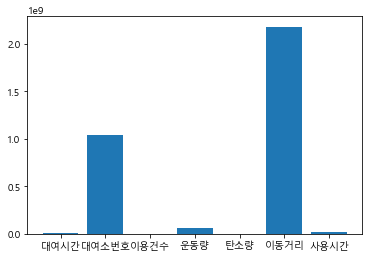

In [31]:
# 차트로 가장 값이 큰 필드(열)
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', family='AppleGothic')
elif platform.system() == "Windows":
    fontName=font_manager.FontProperties(fname="c:/windows/Fonts/malgun.ttf").get_name()
    rc('font', family=fontName)
else:
    print("시스템 정보를 모를겠어요...미안~~~")

    
plt.bar(tmp, colSum)
plt.show()

결측지(결손값)  확인 및 처리

In [32]:
# 결측지 확인
#print(df_b.isna().sum(axis=0))
print(df_b.isna().sum())   # 열에 대한 결측지 갯수 출력

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
대여자성별     317622
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64


In [33]:
print(df_b.isna().sum(axis=1)) # 행별 결측지 갯수 확인 

0         1
1         1
2         1
3         1
4         1
         ..
718852    1
718853    1
718854    1
718855    1
718856    0
Length: 718857, dtype: int64


In [34]:
# 결측지 값 출력
dfNa=df_b.isna().sum()

print(dfNa, "\n")   # 전체
print(dfNa.loc["대여자성별"]) # 특정 값에 대한 출력(index 값 이용)
print(dfNa[5])

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
대여자성별     317622
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64 

317622
317622


In [35]:
# 결측지 비율 계산(결측지수/전체데이터수)

print(dfNa[5]/len(df_b))


0.4418430925761313


<AxesSubplot:>

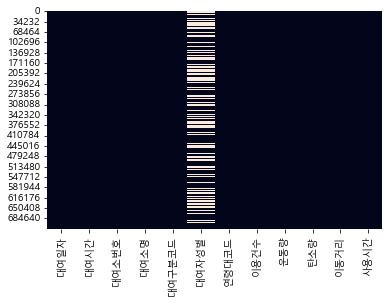

In [36]:
# 결측지를 이용한 시각화(히트맵을 이용한 시각화)
import seaborn as sns   # https://seaborn.pydata.org/

sns.heatmap(df_b.isnull(), cbar=False)

<AxesSubplot:>

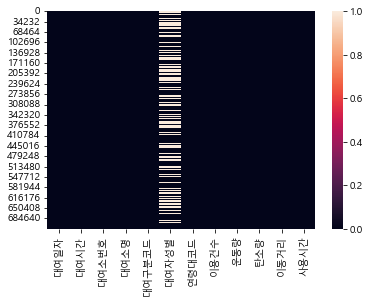

In [37]:
sns.heatmap(df_b.isnull(), cbar=True)

<AxesSubplot:>

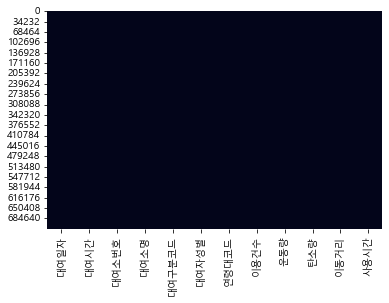

In [38]:
# 대여자성별의 결측지 값을 0 으로 변경후 히트맵 그리기
df_b=df_b.fillna(0)

sns.heatmap(df_b.isnull(), cbar=False)

#### 데이터 정보 확인

In [39]:
# 데이터 구성요소 확인
print(df_b.대여구분코드.unique())
print(df_b['연령대코드'].unique())
print(df_b['대여시간'].unique())

['정기권' '일일권' '단체권' '일일권(비회원)']
['~10대' '20대' '30대' '40대' '50대' '60대' '70대~']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


## 4. 대여소정보/대여정보 하나로 병합하기

In [40]:
print(df_l.info())
print(df_b.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   설치시기      2586 non-null   object 
 1   대여소번호     2586 non-null   int32  
 2   소재지(자치구)  2586 non-null   object 
 3   대여소명      2586 non-null   object 
 4   상세주소      2586 non-null   object 
 5   운영방식      2586 non-null   object 
 6   거치대수      2586 non-null   int64  
 7   상세주소      2586 non-null   object 
 8   위도        2586 non-null   float64
 9   경도        2586 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 192.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여

In [42]:
# 두 데이터를 "대여소번호" 필드를 이용해 열 병합하기
# pd.concat() 함수 사용 불가: 행/열 인덱스를 기준으로 병합
# pd.merge() 함수 사용 
# pd.merge(df_left, df_right, how='inner', on=None)  # how='inner' : 교집합  (구글에서 찾아보세요)

df_m = pd.merge(df_l[['대여소번호', '소재지(자치구)', '대여소명', '운영방식']], 
                df_b[['대여일자', '대여시간', '대여소번호', '대여구분코드', '대여자성별', '연령대코드', 
                      '이용건수','운동량', '탄소량', '이동거리', '사용시간']], on="대여소번호")   

print("전체데이터수:", len(df_m))
display(df_m.head(3))

전체데이터수: 705411


,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,0,정기권,0,20대,1,0.00,0.00,0.00,6
1,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,10,정기권,M,40대,1,28.17,0.22,936.08,5
2,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,11,정기권,M,50대,1,111.81,0.96,4152.22,22


## 5. 병합 데이터 기초통계 및 이상치 시각화
- 기초통계 참조: https://mindscale.kr/course/basic-stat-python/

In [43]:
# df_m의 통계적 개요 확인(교재3:82p~88p)
# df_m.describe(): 데이터에서 숫자형 데이터에 대하여 기초통계 개요(대표값) 출력
display(df_m.describe())

,대여소번호,대여시간,이용건수,운동량,탄소량,이동거리,사용시간
count,705411.000000,705411.000000,705411.000000,705411.000000,705411.000000,705411.000000,705411.000000
mean,1450.945995,14.205476,1.088670,81.408178,0.702716,3028.982186,28.001486
std,1009.398476,5.241979,0.338905,117.408680,0.992709,4278.869104,33.196302
min,102.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,610.000000,11.000000,1.000000,20.670000,0.180000,787.290000,8.000000
50%,1232.000000,15.000000,1.000000,44.600000,0.390000,1677.140000,16.000000
75%,2113.000000,18.000000,1.000000,95.260000,0.830000,3560.845000,36.000000
max,4791.000000,23.000000,14.000000,8621.750000,57.630000,248420.000000,1753.000000


In [44]:
# 모집단에 의한 분산/표준편차
numData=df_m['대여시간']

# 평균 계산 = 전체함계 / 전체데이터갯수
data_m = np.sum(numData)/len(numData)

# 분산 계산 = ((numData[0]-평균)**2 + (numData[1]-평균)**2 + ...) / 전체데이터갯수
vsum = 0
for v in numData:
    vsum += (v - data_m)**2

var = vsum / len(numData)

print("계산 분산:", var)
print("numpy분산:", np.var(numData))

import math
print("모집단에 표준편차:", var**(1/2))
print("모집단에 표준편차:", math.sqrt(var))

계산 분산: 27.478307380318174
numpy분산: 27.478307380342763
모집단에 표준편차: 5.241975522674459
모집단에 표준편차: 5.241975522674459


In [45]:
# 표본에 의한 분산/표준편차
numData=df_m['대여시간']

# 평균 계산 = 전체함계 / 전체데이터갯수
data_m = np.sum(numData)/len(numData)

# 분산 계산 = ((numData[0]-평균)**2 + (numData[1]-평균)**2 + ...) / 전체데이터갯수
vsum = 0
for v in numData:
    vsum += (v - data_m)**2

var = vsum / (len(numData)-1)

print("계산 분산:", var)

print("모집단에 표준편차:", math.sqrt(var))
print("모집단에 표준편차:", df_m['대여시간'].std())

계산 분산: 27.478346333986792
모집단에 표준편차: 5.241979238225461
모집단에 표준편차: 5.241979238227807


In [46]:
# '대여시간'에 대한 표준편차 계산(참조: https://tinyurl.com/y84cgu53)
print(df_m['대여시간'].std())      # pandsa => 표본에 대한 표준편차
print(np.std(df_m['대여시간']))    # numpy => 모집단에 대한 표준편차

5.241979238227807
5.241975522676805


In [47]:
## "이동거리"이 가장 큰 데이터 출력
display(df_m[df_m['이동거리'] == df_m['이동거리'].max()])

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
326173,1163,강서구,방화동강서기동대앞,LCD,2021-01-29,16,정기권,F,50대,1,5902.46,57.63,248420.0,8


### [미션] 기초통계 구하기(최소값, 평균, 최대값, 표준편차), 
- 대상('운동량','탄소량','사용시간', '이동거리')
- 출력 내용 
 * 사용시간: 최소값, 최대값, 평균값, 표준편차
 * 이동거리: 최소값, 최대값, 평균값, 표준편차



In [48]:
colList=['운동량','탄소량','사용시간', '이동거리']

for col in colList:
    print(f'{col}: {df_m[col].min()}/{df_m[col].max()}/{df_m[col].mean()}/{df_m[col].std()}')

운동량: 0.0/8621.75/81.40817829605719/117.40868044318691
탄소량: 0.0/57.63/0.7027155374668101/0.9927093133467316
사용시간: 0/1753/28.001485658715275/33.19630174050385
이동거리: 0.0/248420.0/3028.9821860447314/4278.86910446053


In [49]:
# 탄소량을 기준으로 오름차순 정렬
display(df_m.sort_values("탄소량", ascending=True).head()) # ascending=True : 기본값

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,0,정기권,0,20대,1,0.0,0.0,0.0,6
357904,1253,송파구,오금역 3번 출구 뒤,LCD,2021-01-03,13,정기권,0,20대,3,0.0,0.0,0.0,92
357906,1253,송파구,오금역 3번 출구 뒤,LCD,2021-01-03,13,정기권,M,20대,1,0.0,0.0,0.0,12
357907,1253,송파구,오금역 3번 출구 뒤,LCD,2021-01-03,18,정기권,M,30대,1,0.0,0.0,0.0,8
357911,1253,송파구,오금역 3번 출구 뒤,LCD,2021-01-04,19,정기권,0,30대,1,0.0,0.0,0.0,7


In [50]:
# 탄소량을 기준으로 내림차순 정렬
display(df_m.sort_values("탄소량", ascending=False).head()) 

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
326173,1163,강서구,방화동강서기동대앞,LCD,2021-01-29,16,정기권,F,50대,1,5902.46,57.63,248420.0,8
332520,1178,강서구,개화산역 2번 출구,LCD,2021-01-18,21,정기권,M,20대,1,6001.74,55.81,240570.0,17
259255,913,은평구,이마트 은평점,LCD,2021-01-25,17,정기권,F,20대,1,4997.45,55.24,238110.0,70
301815,1112,강서구,마곡엠밸리4단지 정문,LCD,2021-01-09,17,정기권,0,20대,1,5239.30,54.81,236260.0,8
491489,1936,구로구,개봉역 1번 출구 자전거보관서쪽,LCD,2021-01-06,9,일일권,M,20대,1,8621.75,53.17,229180.0,55


In [51]:
## 이동거리가 0이면서 사용시간이 100인 데이터 확인
tmp = df_m[(df_m['이동거리'] == 0) & (df_m['사용시간'] > 100)]
#print(tmp.info())
#tmp['이동거리'].groupby(tmp['대여소번호']).count()
tmp.groupby('대여소번호')[['이동거리']].count()

,이동거리
대여소번호,
102,3
103,2
104,5
105,2
106,6
...,...
4710,1
4711,1
4753,1


In [52]:
# 자치구별 대여소 설치 갯수 확인
df_m.groupby('소재지(자치구)')[['대여소번호']].count() # df 선택 오류

,대여소번호
소재지(자치구),
강남구,22066
강동구,23272
강북구,14226
강서구,65146
관악구,23884
광진구,32820
구로구,27721
금천구,11920
노원구,36536


In [53]:
# 자치구별 대요소 설치 건수/평균 이용건수 / 평균 이동거리 / 최대 이동거리
# 계산 결과는 하나의 DataFrame으로 구성

df_gu = pd.DataFrame()

df_gu1=df_l.groupby('소재지(자치구)')[['대여소번호']].count()
df_gu = pd.concat([df_gu, df_gu1], ignore_index = True, axis=1)

df_gu1=df_m.groupby('소재지(자치구)')[['이용건수']].mean()
df_gu = pd.concat([df_gu, df_gu1], ignore_index = True, axis=1)

df_gu1=df_m.groupby('소재지(자치구)')[['이동거리']].mean()
df_gu = pd.concat([df_gu, df_gu1], ignore_index = True, axis=1)

df_gu1=df_m.groupby('소재지(자치구)')[['이동거리']].max()
df_gu = pd.concat([df_gu, df_gu1], ignore_index = True, axis=1)

df_gu.columns=["설치건수", "평균이용건수", '평균이동거리', '최대이동거리']
display(df_gu)


,설치건수,평균이용건수,평균이동거리,최대이동거리
소재지(자치구),,,,
강남구,153,1.063763,3929.422903,97690.14
강동구,117,1.074768,2597.356375,75362.23
강북구,58,1.064038,2886.535993,57210.00
강서구,181,1.103107,2377.052902,248420.00
관악구,76,1.101658,3398.369559,65460.00
광진구,86,1.104966,2770.209115,84182.62
구로구,99,1.095740,3436.981742,229180.00
금천구,72,1.088507,3515.733218,77306.90
노원구,123,1.085888,2932.522539,80866.77


### "이동거리" 와 "탄소량"의 상관도 확인(df_m)
- 상관도: 두 데이터가 서로 영향을 주는 정도 
- 상관계수(correlation coefficient): 두 변수가 함께 변하는 정도를 -1 ~ 1 범위의 수로 나타낸 것
- 상관이 +인 경우: 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나도 증가)
- 상관이 -인 경우: 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하나는 감소)


In [54]:
df_m.head()

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,0,정기권,0,20대,1,0.00,0.00,0.00,6
1,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,10,정기권,M,40대,1,28.17,0.22,936.08,5
2,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,11,정기권,M,50대,1,111.81,0.96,4152.22,22
3,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,12,정기권,0,50대,1,0.00,0.00,0.00,41
4,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,12,정기권,F,40대,1,0.00,0.00,0.00,41


In [55]:
# DataFrame에서 상관도 확인
df_m.corr()

,대여소번호,대여시간,이용건수,운동량,탄소량,이동거리,사용시간
대여소번호,1.000000,-0.005731,-0.019928,0.003472,0.003103,0.003109,-0.008476
대여시간,-0.005731,1.000000,0.057254,0.053744,0.057389,0.057396,0.073809
이용건수,-0.019928,0.057254,1.000000,0.278377,0.292708,0.292701,0.344897
운동량,0.003472,0.053744,0.278377,1.000000,0.974993,0.974996,0.641949
탄소량,0.003103,0.057389,0.292708,0.974993,1.000000,0.999996,0.668347
이동거리,0.003109,0.057396,0.292701,0.974996,0.999996,1.000000,0.668350
사용시간,-0.008476,0.073809,0.344897,0.641949,0.668347,0.668350,1.000000


In [56]:
# 이동거리와 탄소량의 상관도 확인
np.corrcoef(df_m['탄소량'], df_m['이동거리'])

array([[1.        , 0.99999595],
       [0.99999595, 1.        ]])

In [57]:
print(type(df_m['탄소량']))
print(type(df_m['탄소량'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [58]:
# 상관도 시각화
# 구글에서 '파이썬 상관도 시각화' 검색후 직접 작성해 보세요
# 대상: df_m.corr()




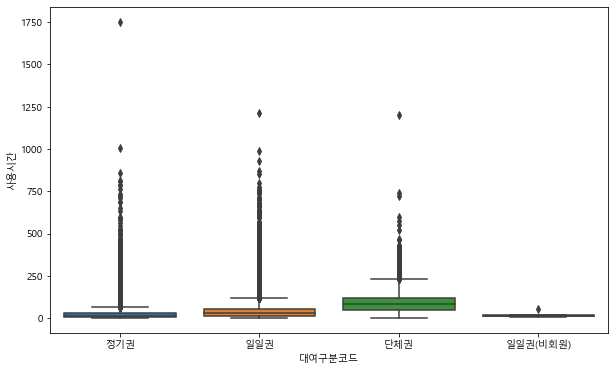

In [59]:
# 이상치 확인/seaborn.boxplot() 시각화 사용
# 구글에서 boxplot() 보는 법 검색

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='대여구분코드', y='사용시간', data=df_m)
plt.show()

### [미션] 아래 지시사항에 따라 코드를 작성하시오.
- 데이터: df_m

In [ ]:
# [미션1] "대여구분코드"의 유니크값 확인(for문 사용 / 힘들면 함수 사용)


In [ ]:
# [미션2] "대여구분코드" 별로 자료를 CSV 형식으로 저장.


In [ ]:
# [미션3] for문을 이용해 '대여구분코드','대여자성별','연령대코드'의 유니크 한 값 확인하기


In [61]:
# [미션4] 이동거리 계산해 "이동거리(Km)" 필드 추가하기
# 이동거리(km) = '이동거리' / 100
df_m['이동거리(km)'] = df_m['이동거리'] / 100
df_m.head(3)

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,이동거리(km)
0,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,0,정기권,0,20대,1,0.00,0.00,0.00,6,0.0000
1,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,10,정기권,M,40대,1,28.17,0.22,936.08,5,9.3608
2,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,11,정기권,M,50대,1,111.81,0.96,4152.22,22,41.5222


In [68]:
# [미션5] 대여일자에서 월만 추출해 '월' 필드 생성(df_m 데이터 사용)
df_m['월']=df_m.대여일자.str.split('-').str[1]
df_m.head(3)

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,이동거리(km),월
0,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,0,정기권,0,20대,1,0.00,0.00,0.00,6,0.0000,01
1,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,10,정기권,M,40대,1,28.17,0.22,936.08,5,9.3608,01
2,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,11,정기권,M,50대,1,111.81,0.96,4152.22,22,41.5222,01


In [69]:
# [미션6] 이용건수가 10건이상이며 'vip', 그외는 '일반' 으로 '이용등급' 필드 제작


In [74]:
#[미션7] 대여일자를 날짜형 데이터로 변경
df_m.dtypes
df_m['대여일자'] = pd.to_datetime(df_m['대여일자'])
df_m.dtypes

대여소번호                int32
소재지(자치구)            object
대여소명                object
운영방식                object
대여일자        datetime64[ns]
대여시간                 int64
대여구분코드              object
대여자성별               object
연령대코드               object
이용건수                 int64
운동량                float64
탄소량                float64
이동거리               float64
사용시간                 int64
이동거리(km)           float64
월                   object
dtype: object

In [78]:
#[미션7] 대여일자를 이용해 '요일', '월' 필드(열) 추가
df_m['월_함수'] = df_m['대여일자'].dt.month
df_m['요일'] = df_m['대여일자'].dt.day_name()
df_m.head()

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,이동거리(km),월,월_함수,요일
0,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,0,정기권,0,20대,1,0.00,0.00,0.00,6,0.0000,01,1,Friday
1,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,10,정기권,M,40대,1,28.17,0.22,936.08,5,9.3608,01,1,Friday
2,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,11,정기권,M,50대,1,111.81,0.96,4152.22,22,41.5222,01,1,Friday
3,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,12,정기권,0,50대,1,0.00,0.00,0.00,41,0.0000,01,1,Friday
4,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,12,정기권,F,40대,1,0.00,0.00,0.00,41,0.0000,01,1,Friday


In [79]:
df_m['요일'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [82]:
# 월~금: 주중, 토/일:주말  => '주중주말' 필드 생성

#wd = []
#for w in df_m['요일']:
#    if w == "Sunday" or w == 'Saturday':
#        wd.append('주말')
#    else:
#        wd.append('주중')

#df_m['주중주말'] = wd

df_m['주중주말'] = ["주말" if (w == "Sunday" or w == 'Saturday') else "주중" for w in df_m['요일']]
df_m.head()

,대여소번호,소재지(자치구),대여소명,운영방식,대여일자,대여시간,대여구분코드,대여자성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,이동거리(km),월,월_함수,요일,주중주말
0,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,0,정기권,0,20대,1,0.00,0.00,0.00,6,0.0000,01,1,Friday,주중
1,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,10,정기권,M,40대,1,28.17,0.22,936.08,5,9.3608,01,1,Friday,주중
2,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,11,정기권,M,50대,1,111.81,0.96,4152.22,22,41.5222,01,1,Friday,주중
3,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,12,정기권,0,50대,1,0.00,0.00,0.00,41,0.0000,01,1,Friday,주중
4,102,마포구,망원역 1번출구 앞,LCD,2021-01-01,12,정기권,F,40대,1,0.00,0.00,0.00,41,0.0000,01,1,Friday,주중


## 데이터 EDA를 위한 시각화

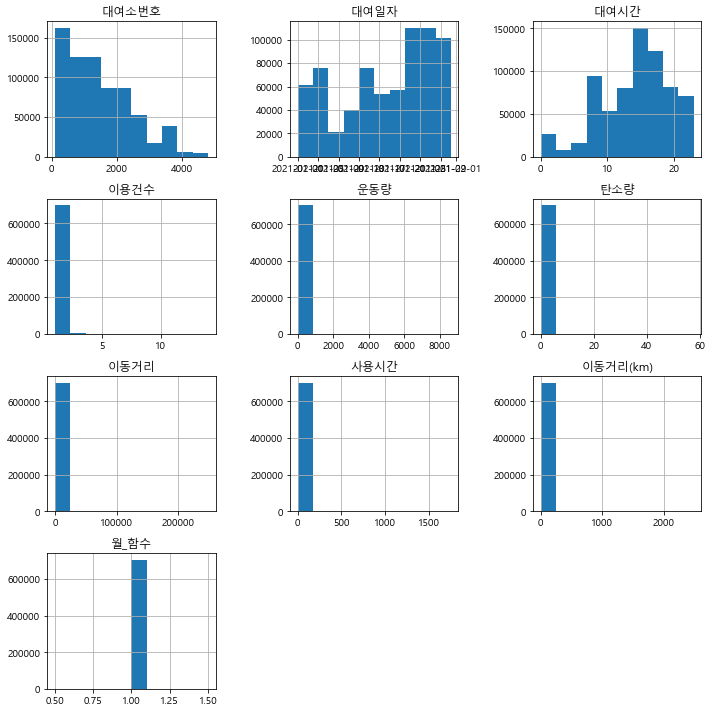

In [83]:
# 데이터 시각화
df_m.hist(figsize=(10, 10))
plt.tight_layout()  # 그리프 간격 설정
plt.show()

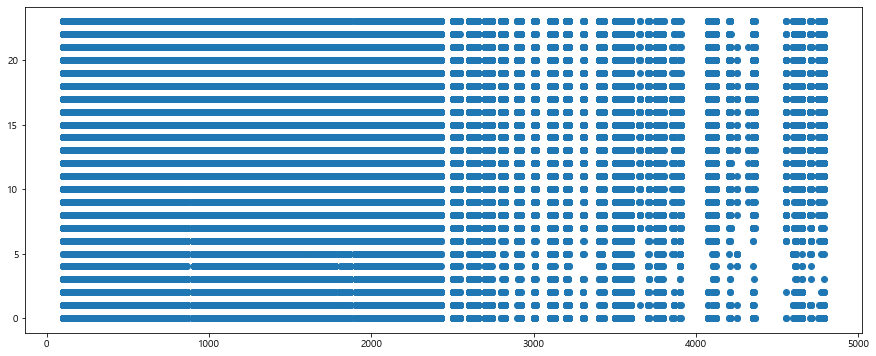

In [85]:
# 대여시간을 기준으로 산점도 차트 작성
plt.figure(figsize=(15, 6))
plt.scatter(df_m.대여소번호, df_m.대여시간)
plt.show()

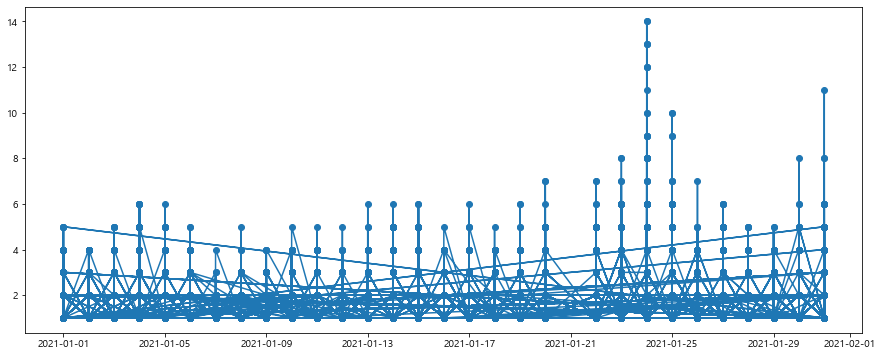

In [86]:
# 일자별 이용현황 그래프(꺾은선 차트)_기본 데이터 이용
plt.figure(figsize=(15, 6))
plt.plot(df_m.대여일자, df_m['이용건수'], marker='o')
plt.show()

In [93]:
# 일자별 이용현황 그래프(꺾은선 차트) => 일자별 집계를 통해 차트 그리기
# 일자별 집계
# df_m['이용건수'].groupby(df_m['대여일자']).sum()
chrat_df=df_m.groupby('대여일자')['이용건수'].sum()
chrat_df.head()

대여일자
2021-01-01    21426
2021-01-02    22805
2021-01-03    21122
2021-01-04    31936
2021-01-05    28154
Name: 이용건수, dtype: int64

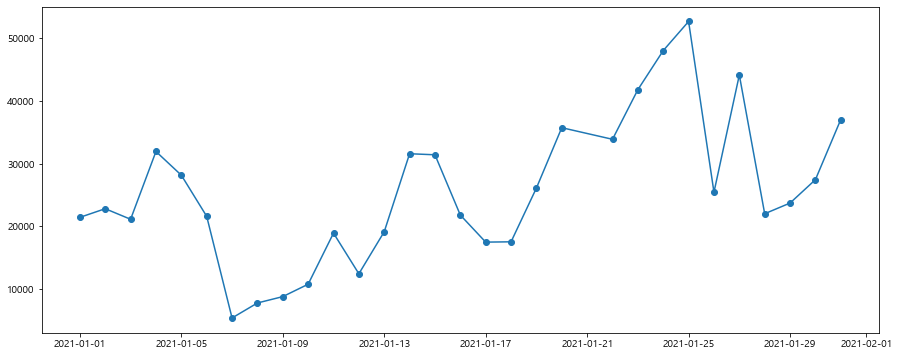

In [95]:
plt.figure(figsize=(15, 6))
plt.plot(chrat_df.index, chrat_df, marker='o')
plt.show()

In [96]:
# df_m['이용건수'].groupby(df_m['대여일자']).sum()
chrat_df=df_m.groupby('대여일자')[['이용건수']].sum()
chrat_df.head()

,이용건수
대여일자,
2021-01-01,21426
2021-01-02,22805
2021-01-03,21122
2021-01-04,31936
2021-01-05,28154


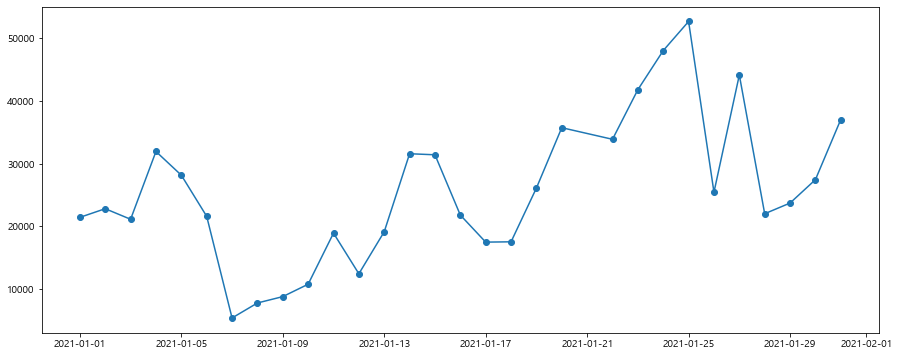

In [97]:
plt.figure(figsize=(15, 6))
plt.plot(chrat_df.index, chrat_df.이용건수, marker='o')
plt.show()

,이용건수
요일,
Friday,118188
Monday,121051
Saturday,122619
Sunday,134426
Thursday,58955


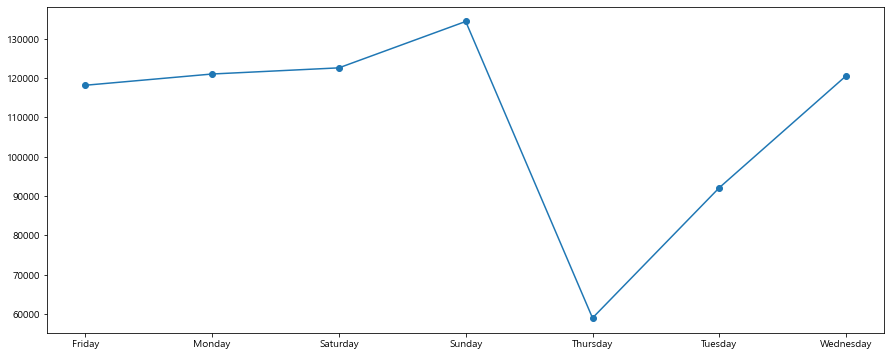

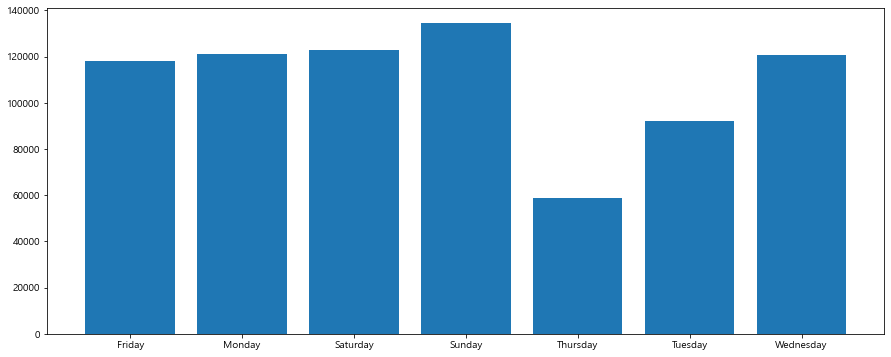

In [114]:
# 요일별 이용 건수 그래프로 확인
chrat_df=df_m.groupby('요일')[['이용건수']].sum()
display(chrat_df.head())

plt.figure(figsize=(15, 6))
plt.plot(chrat_df.index, chrat_df.이용건수, marker='o')
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(chrat_df.index, chrat_df.이용건수)
plt.show()

이용건수
요일     대여시간      
Friday 0     1520
       1     1337
       2      938
       3      756
       4      597

,요일,대여시간,이용건수
0,Friday,0,1520
1,Friday,1,1337
2,Friday,2,938
3,Friday,3,756
4,Friday,4,597


,요일,대여시간,이용건수
0,Friday,0,1520
1,Friday,1,1337
2,Friday,2,938
3,Friday,3,756
4,Friday,4,597


,이용건수
대여시간,
0,2036
1,1623
2,1179
3,771
4,558


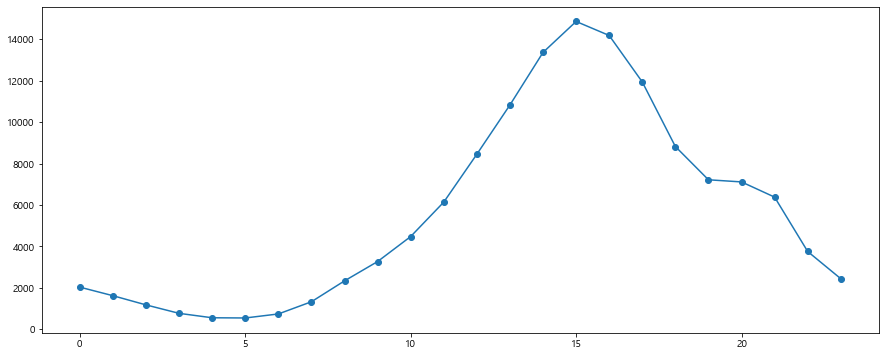

In [112]:
# 요일별/대여시간에 따른 이용 건수 그래프로 확인 (2개 이상을 groupby할 경우)
chrat_df=df_m.groupby(['요일', '대여시간'])[['이용건수']].sum()
display(chrat_df.head())

chrat_df = chrat_df.reset_index(drop=False)
display(chrat_df.head())

chrat_df_m = chrat_df[chrat_df['요일']=='Sunday']
display(chrat_df.head())

chrat_df_m=chrat_df_m.groupby('대여시간')[['이용건수']].sum()
display(chrat_df_m.head())

plt.figure(figsize=(15, 6))
plt.plot(chrat_df_m.index, chrat_df_m.이용건수, marker='o')
plt.show()

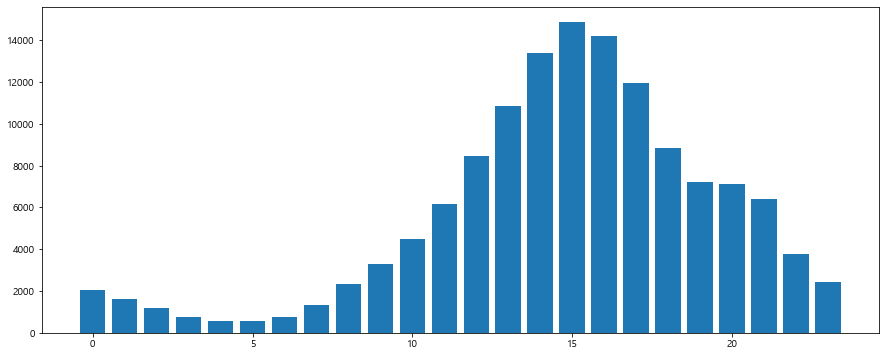

In [113]:
# 시간대표 막대그래프
plt.figure(figsize=(15, 6))
plt.bar(chrat_df_m.index, chrat_df_m.이용건수)
plt.show()

In [ ]:
# 소재지(자치구)별 이용건수 집계 및 막대차트(각자 해봅니다.)



,이용건수
요일,
Friday,118188
Monday,121051
Saturday,122619
Sunday,134426
Thursday,58955


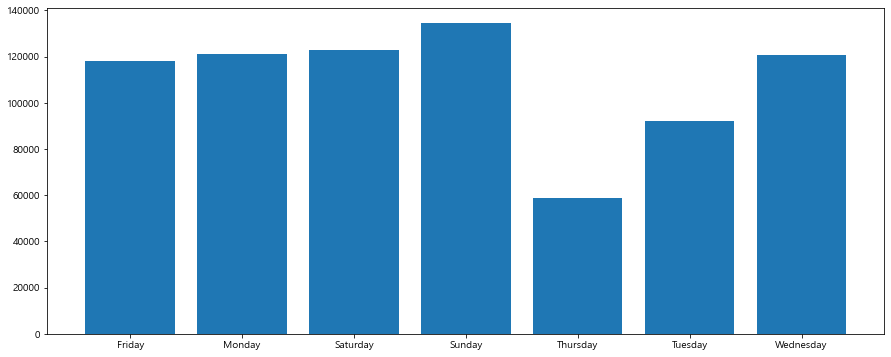

In [116]:
# 요일별 이용 건수 그래프로 확인
chrat_df=df_m.groupby('요일')[['이용건수']].sum()
display(chrat_df.head())

plt.figure(figsize=(15, 6))
plt.bar(chrat_df.index, chrat_df.이용건수)
plt.show()

===== 정렬이 되지 않은 상태 ========


,이용건수
요일,
Friday,118188
Monday,121051
Saturday,122619
Sunday,134426
Thursday,58955
Tuesday,92122
Wednesday,120599


===== 정렬을 한 상태 ========


,이용건수
요일,
Monday,121051
Tuesday,92122
Wednesday,120599
Thursday,58955
Friday,118188
Saturday,122619
Sunday,134426


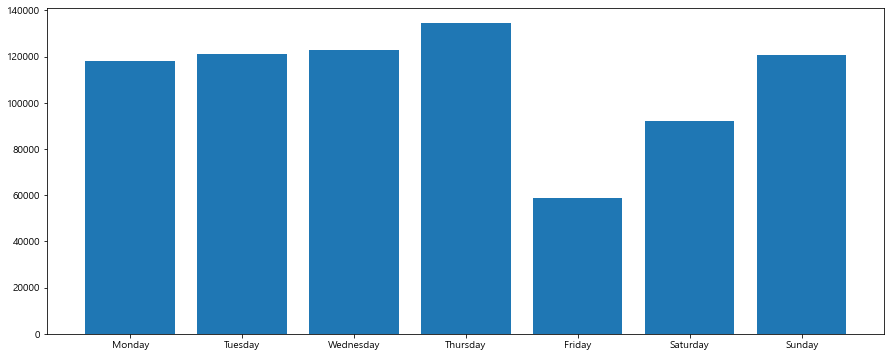

In [120]:
# 요일을 원하는 순서대로 표현(사용자 정렬)
weekDayName=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


chrat_df=df_m.groupby('요일')[['이용건수']].sum()

print("===== 정렬이 되지 않은 상태 ========")
display(chrat_df)

print("===== 정렬을 한 상태 ========")
df_sort = chrat_df.loc[weekDayName]  # groupby 결과에 대하여 index 값의 순서 변경
display(df_sort)
print()

plt.figure(figsize=(15, 6))
plt.bar(weekDayName, chrat_df.이용건수)
plt.show()


[121051, 92122, 120599, 58955, 118188, 122619, 134426]


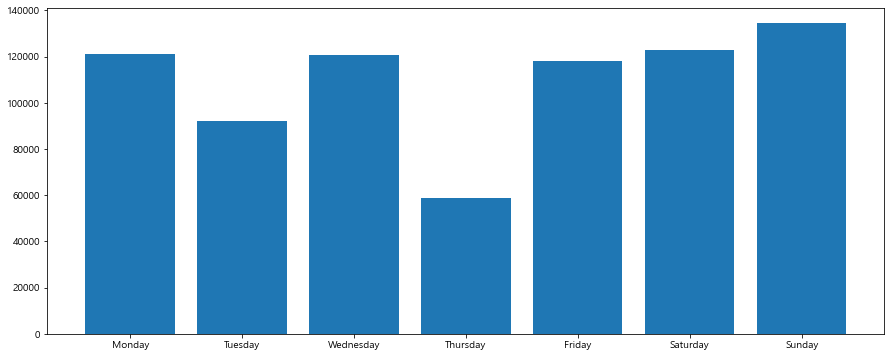

In [122]:
## 참고: 직접 정렬하는 코드를 제작할 수 있음

weekDayName=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekDayValue = []
for i in weekDayName:
    for j, value in zip(chrat_df.index, chrat_df.이용건수):
        if i == j:
            weekDayValue.append(value)
            
print(weekDayValue)

plt.figure(figsize=(15, 6))
plt.bar(weekDayName, weekDayValue)
plt.show()